In [3]:
# Import packages
#import plotly.express as px
import pandas as pd
#from statsmodels.tsa.stattools import adfuller
import numpy as np
import sklearn as sk
## import pmdarima
import tensorflow
## import fprophet
## from pmdarima.arima import auto_arima
## from fbprophet import Prophet
## from tensorflow.keras.models import Sequential
## from tensorflow.keras.layers import LSTM, Dense
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
import plotly.express as px
from prophet import Prophet



C:\Users\alaaw\AppData\Local\Temp\ipykernel_28848\1620629528.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [20]:
# Read in the data
data = pd.read_excel("NanOver9removedlong.xlsx")
data.head()

,Product/Sector,Reporting Economy,Year,Value
0,SI3_AGG - TO - Total merchandise,World,2005,10510291.0
1,SI3_AGG - AG - Agricultural products,World,2005,847715.0
2,SI3_AGG - AGFO - Food,World,2005,680936.0
3,SI3_AGG - MI - Fuels and mining products,World,2005,1810185.0
4,SI3_AGG - MIFU - Fuels,World,2005,1457315.0


In [21]:
from datetime import datetime, date 
data['Year'] = pd.to_datetime(data.Year, format = '%Y')
data['Value'] = pd.to_numeric(data.Value)
data.head()

,Product/Sector,Reporting Economy,Year,Value
0,SI3_AGG - TO - Total merchandise,World,2005-01-01,10510291.0
1,SI3_AGG - AG - Agricultural products,World,2005-01-01,847715.0
2,SI3_AGG - AGFO - Food,World,2005-01-01,680936.0
3,SI3_AGG - MI - Fuels and mining products,World,2005-01-01,1810185.0
4,SI3_AGG - MIFU - Fuels,World,2005-01-01,1457315.0


In [22]:
df = data.iloc[:,2:]
df.head()

,Year,Value
0,2005-01-01,10510291.0
1,2005-01-01,847715.0
2,2005-01-01,680936.0
3,2005-01-01,1810185.0
4,2005-01-01,1457315.0


In [23]:
df.index = pd.DatetimeIndex(data.index).to_period('Y')
df=df.set_index('Year')
df.head()

,Value
Year,
2005-01-01,10510291.0
2005-01-01,847715.0
2005-01-01,680936.0
2005-01-01,1810185.0
2005-01-01,1457315.0


<Axes: xlabel='Year', ylabel='Value'>

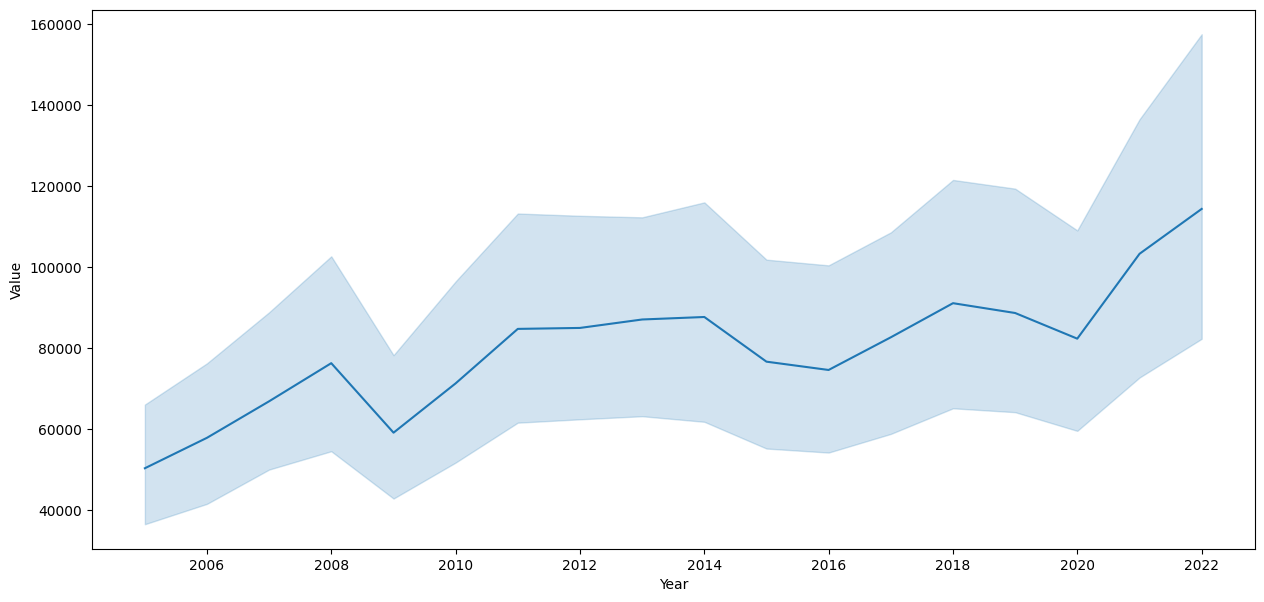

In [24]:
plt.figure(figsize=(15,7))
sns.lineplot(x = df.index, y= data.Value)

In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit

In [25]:
n_samples = len(df)
print(f"Number of samples in the dataset: {n_samples}")

# Define number of splits
n_splits = 5
if n_splits >= n_samples:
    n_splits = n_samples - 1  # Ensure there are enough samples for the splits
    print(f"Adjusted number of splits to: {n_splits}")

Number of samples in the dataset: 52236


In [26]:
# Define number of splits
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

In [27]:


# Initialize lists to store evaluation metrics and models
mse_scores = []
mape_scores = []
models = []

# Iterate over train-test splits and train models
for train_index, test_index in tscv.split(df):
    train_data, test_data = df.iloc[train_index], df.iloc[test_index]

    # Fit ARIMA model
    model = ARIMA(train_data, order=(5, 1, 0))  # Example order for ARIMA
    fitted_model = model.fit()

    # Save the fitted model
    models.append(fitted_model)

    # Make predictions
    predictions = fitted_model.forecast(steps=len(test_data))

    # Calculate Mean Squared Error
    mse = mean_squared_error(test_data, predictions)
    mse_scores.append(mse)

    # Calculate Mean Absolute Percentage Error
    mape = mean_absolute_percentage_error(test_data, predictions)
    mape_scores.append(mape)

    print(f'Mean Squared Error for current split: {mse}')
    print(f'Mean Absolute Percentage Error for current split: {mape}')




C:\Users\alaaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

Mean Squared Error for current split: 330179386872.817
Mean Absolute Percentage Error for current split: 4.177566494211529


C:\Users\alaaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

Mean Squared Error for current split: 508072913469.2529
Mean Absolute Percentage Error for current split: 1.5073960634694838


C:\Users\alaaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

Mean Squared Error for current split: 451080826210.93884
Mean Absolute Percentage Error for current split: 1.6786877631549906


C:\Users\alaaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

Mean Squared Error for current split: 538178238470.0154
Mean Absolute Percentage Error for current split: 1.256824796939918


C:\Users\alaaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

Mean Squared Error for current split: 721443195588.4473
Mean Absolute Percentage Error for current split: 1.4347957177249426


In [28]:
# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [29]:
# Calculate average Mean Squared Error and MAPE across all splits
average_mse = np.mean(mse_scores)
average_mape = np.mean(mape_scores)
print(f'Average Mean Squared Error across all splits: {average_mse}')
print(f'Average Mean Absolute Percentage Error across all splits: {average_mape}')



Average Mean Squared Error across all splits: 509790912122.2943
Average Mean Absolute Percentage Error across all splits: 2.0110541671001725


In [30]:
# The final model is the one from the last split
final_model = models[-1]

# Optionally, save the final model to disk for future use
import pickle
with open('final_arima_model.pkl', 'wb') as model_file:
    pickle.dump(final_model, model_file)

print('Final model saved to disk.')

Final model saved to disk.
